In [14]:
import tensorflow as tf
import keras 
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import KFold



In [15]:
df = pd.read_csv(r"C:\Users\MinhThw\OneDrive\Desktop\DATN\data\hyper.csv", sep=";")

In [16]:

df['Hypertension'] = df['Hypertension'].map({'Normal': 0, 'Prehypertension': 1, 'Stage 1 hypertension': 2,'Stage 2 hypertension':3})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['BMI'] = pd.to_numeric(df['BMI'].str.replace(',', '.'), errors='coerce')
df['Diabetes'] = df['Diabetes'].map(lambda x: 0 if pd.isna(x) else 1)
df['CI'] = df['Cerebral Infarction'].map(lambda x: 0 if pd.isna(x) else 1)
df['CD'] = df['Cerebrovascular Disease'].map(lambda x: 0 if pd.isna(x) else 1)
df['SBP'] = df['Systolic Blood Pressure']
df['DBP'] = df['Diastolic Blood Pressure']
df = df.drop(['Num', 'Subject_ID','Cerebral Infarction', 'Cerebrovascular Disease', 'Diastolic Blood Pressure', 'Systolic Blood Pressure'], axis =1)

In [17]:
print (df)

     Sex  Age  Height  Weight  Heart Rate        BMI  Diabetes  Hypertension  \
0      0   45     152      63          97  27.268006         0             3   
1      0   50     157      50          76  20.284799         0             3   
2      0   47     150      47          79  20.888889         0             0   
3      1   45     172      65          87  21.971336         0             1   
4      0   46     155      65          73  27.055151         0             1   
..   ...  ...     ...     ...         ...        ...       ...           ...   
214    1   24     180      70          77  21.604938         0             0   
215    0   25     156      47          79  19.312952         0             0   
216    1   25     176      55          72  17.755682         0             1   
217    1   25     173      63          67  21.049818         0             0   
218    1   24     175      58          65  18.938776         0             0   

     CI  CD  SBP  DBP  
0     0   0  16

In [18]:
# Phân tích mối quan hệ giữa các thuộc tính và biến mục tiêu
#plt.figure(figsize=(16, 8))
#for i, col in enumerate(df.columns[:-1]):
    #plt.subplot(3, 5, i+1)
    #sns.scatterplot(x=col, y='Risk', data=df)
    #plt.title(col)
#plt.tight_layout()
#plt.show()


In [19]:
# Tạo biến nhị phân (dummy variables) cho các feature định tính
columns_to_get_dummies = ['Sex', 'Diabetes', 'CI', 'CD']
data = pd.get_dummies(df, columns=columns_to_get_dummies).drop(['Sex_0', 'Diabetes_0', 'CI_0', 'CD_0'], axis=1)

# Chuẩn hóa (standardize) các feature định lượng
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'Height', 'Weight', 'SBP', 'DBP', 'Heart Rate', 'BMI']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [20]:
print (data)#.astype(int))

          Age    Height    Weight  Heart Rate       BMI  Hypertension  \
0   -0.768337 -1.127587  0.236798    2.180326  1.041372             3   
1   -0.452641 -0.516648 -0.859404    0.220334 -0.706481             3   
2   -0.642058 -1.371963 -1.112373    0.500333 -0.555281             0   
3   -0.768337  1.316169  0.405444    1.246997 -0.284352             1   
4   -0.705198 -0.761024  0.405444   -0.059665  0.988096             1   
..        ...       ...       ...         ...       ...           ...   
214 -2.094258  2.293672  0.827060    0.313667 -0.376059             0   
215 -2.031119 -0.638836 -1.112373    0.500333 -0.949728             0   
216 -2.031119  1.804921 -0.437788   -0.152998 -1.339503             1   
217 -2.031119  1.438357  0.236798   -0.619663 -0.515002             0   
218 -2.094258  1.682733 -0.184818   -0.806329 -1.043382             0   

          SBP       DBP  Sex_1  Diabetes_1   CI_1   CD_1  
0    1.625816  1.547085  False       False  False  False  
1    

In [21]:

#X = result.to_numpy()
  

# Chia thành tập huấn luyện và tập kiểm tra
data_row_dim = 1
data_col_dim = 12
X = data.drop(['Hypertension'], axis = 1).to_numpy()
print(X.shape)
#X = X.values.reshape(-1, data_row_dim, data_col_dim)
#print(X.shape)   
y_temp = data['Hypertension']
# Chuyển đổi kiểu dữ liệu của y thành số thực
y = y_temp.dropna().astype('float32').to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#X_train = X_train.reshape(X_train.shape[0],data_row_dim,data_col_dim,1)
#X_test = X_test.reshape(X_test.shape[0],data_row_dim,data_col_dim,1)
input_shape = (data_row_dim,data_col_dim,1)

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#print('X_train.shape', X_test.shape)
print(X_train.shape[0],'Train Sample')
print(X_test.shape[0],'Test Sample')



(219, 11)
(175, 11) (175,)
(44, 11) (44,)
(175, 11) (175,)
(44, 11) (44,)
175 Train Sample
44 Test Sample


In [22]:
# Giả sử X, y, X_test, và y_test đã được định nghĩa

# Tạo mô hình
def create_model():
    model = Sequential()
    model.add(Dense(units=16, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.25))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    return model

In [23]:
# Tạo K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

test_predictions = []
accuracy_scores = []
f1_scores = []

# Chạy K-Fold Cross-Validation
for i, (train_index, val_index) in enumerate(kfold.split(X)):
    print(f"Fold {i+1}/{kfold.n_splits}")

    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Chuyển đổi dữ liệu sang float32
    X_train_fold = X_train_fold.astype('float32')
    y_train_fold = y_train_fold.astype('float32')
    X_val_fold = X_val_fold.astype('float32')
    y_val_fold = y_val_fold.astype('float32')

    # Tạo mô hình
    model = create_model()

    # Huấn luyện mô hình
    model.fit(X_train_fold, y_train_fold, batch_size=128, epochs=270, verbose=0, validation_data=(X_val_fold, y_val_fold))

    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Lấy lớp có xác suất cao nhất
    
    # Chuyển đổi y_val_fold về dạng một chiều nếu cần
    # Kiểm tra xem y_val_fold có phải là one-hot encoding hay không
    if len(y_val_fold.shape) > 1:  # Nếu y_val_fold là một mảng 2 chiều
        y_val_true = np.argmax(y_val_fold, axis=1)  # Chuyển đổi về nhãn số nguyên
    else:
        y_val_true = y_val_fold.astype(int)  # Nếu là mảng 1 chiều, chuyển đổi về int
    
    # In ra kích thước
    print("y_val_true shape:", y_val_true.shape)
    print("y_val_pred_classes shape:", y_val_pred_classes.shape)
    
    # Kiểm tra lại kích thước
    if y_val_true.shape == y_val_pred_classes.shape:
        accuracy = accuracy_score(y_val_true, y_val_pred_classes)
        f1 = f1_score(y_val_true, y_val_pred_classes, average='weighted')
    
        # Lưu kết quả
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
    
        print(f"Accuracy for fold {i+1}: {accuracy:.4f}")
        print(f"F1 Score for fold {i+1}: {f1:.4f}")
    else:
        print("Mismatch in number of samples between y_val_true and y_val_pred_classes.")

Fold 1/5
2/2 [==============================] - 0s 3ms/step
y_val_true shape: (44,)
y_val_pred_classes shape: (44,)
Accuracy for fold 1: 0.7727
F1 Score for fold 1: 0.7683
Fold 2/5
2/2 [==============================] - 0s 3ms/step
y_val_true shape: (44,)
y_val_pred_classes shape: (44,)
Accuracy for fold 2: 0.7045
F1 Score for fold 2: 0.6887
Fold 3/5
2/2 [==============================] - 0s 3ms/step
y_val_true shape: (44,)
y_val_pred_classes shape: (44,)
Accuracy for fold 3: 0.8409
F1 Score for fold 3: 0.8345
Fold 4/5
2/2 [==============================] - 0s 3ms/step
y_val_true shape: (44,)
y_val_pred_classes shape: (44,)
Accuracy for fold 4: 0.8864
F1 Score for fold 4: 0.8852
Fold 5/5
2/2 [==============================] - 0s 3ms/step
y_val_true shape: (43,)
y_val_pred_classes shape: (43,)
Accuracy for fold 5: 0.8837
F1 Score for fold 5: 0.8837


In [24]:
from sklearn.metrics import classification_report
# Dự đoán trên tập test
y_test_pred = model.predict(X_test)
test_predictions.append(y_test_pred)  # Không cần flatten với đầu ra softmax

# Tính trung bình dự đoán từ tất cả các fold
average_predictions = np.mean(test_predictions, axis=0)

# Lấy nhãn dự đoán bằng np.argmax
average_pred_classes = np.argmax(average_predictions, axis=-1)

# In bảng classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, average_pred_classes))

2/2 [==============================] - 0s 4ms/step
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.94      0.97        17
         2.0       0.89      0.80      0.84        10
         3.0       0.60      1.00      0.75         3

    accuracy                           0.93        44
   macro avg       0.87      0.94      0.89        44
weighted avg       0.95      0.93      0.94        44



[[14  0  0  0]
 [ 0 16  1  0]
 [ 0  0  8  2]
 [ 0  0  0  3]]


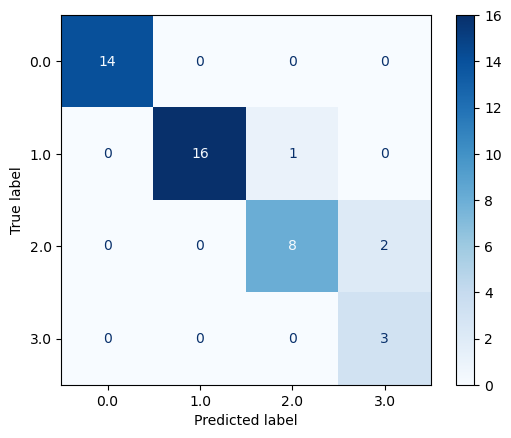

In [25]:
# Vẽ confusion matrix
cm = confusion_matrix(y_test, average_pred_classes)
print (cm)
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, average_pred_classes, cmap='Blues')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
plt.show()